In [187]:
import yfinance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from sklearn.cluster import DBSCAN

import warnings
warnings.filterwarnings('ignore')

# **Reading the CSV files**

In [188]:
# Read the CSV file
filenames = ['sensex_1990_to_2014.csv',
             'nifty_1994_to_2014.csv',
             'nifty_2000_to_2024.csv']

file_name = 'nifty_1994_to_2014.csv'

#file_name = 'nifty_1994_to_2014.csv'
#file_name = 'nifty_2000_to_2024.csv'

data = pd.read_csv(file_name)
data.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1695,2014-08-22,7904.549805,7929.049805,7900.049805,7913.200195,7913.200195,104100
1696,2014-08-25,7931.750000,7968.250000,7897.950195,7906.299805,7906.299805,118500
1697,2014-08-26,7874.500000,7915.450195,7862.450195,7904.750000,7904.750000,142800
1698,2014-08-27,7933.899902,7946.850098,7916.549805,7936.049805,7936.049805,120000
1699,2014-08-28,7942.250000,7967.799805,7939.200195,7954.350098,7954.350098,189700


In [189]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000,1700.000000
mean,5291.749764,5336.862885,5241.120997,5290.119381,5290.119381,38655.058824
std,996.396802,989.287755,1003.653913,996.116806,996.116806,74383.681317
min,2553.600098,2585.300049,2252.750000,2524.199951,2524.199951,0.000000
25%,4882.237305,4935.449829,4835.637451,4887.637451,4887.637451,0.000000
50%,5342.224854,5382.899902,5297.350098,5334.349854,5334.349854,0.000000
75%,5888.749878,5923.625122,5844.474976,5889.887451,5889.887451,0.000000
max,7942.250000,7968.250000,7939.200195,7954.350098,7954.350098,437000.000000


# **Calculate the Technical Indicator**

In [190]:
# Define the parameters
sma_window_size = 3
ema_smoothing_param = 0.2
williams_r_window_size = 3
RSI_window_size = 14
ATR_window_size = 14
VR_window_size = 14

k_param = 10                 # Defining the k parameter for KNN algorithm
training_set_ratio = 0.9     # Defining the training set for KNN algorithm
enable_knn_normalization = True

In [191]:
def TI_calculations(data):
    data = data[['Close']]
    data['returns'] = -data['Close'].diff(-1)
    
    # Remove non-numeric values
    data = data.apply(pd.to_numeric, errors='coerce')
    data.dropna(inplace = True)
    return data

data = TI_calculations(data)
data.tail()

,Close,returns
1694,7891.100098,22.100098
1695,7913.200195,-6.900391
1696,7906.299805,-1.549805
1697,7904.750000,31.299805
1698,7936.049805,18.300293


# **KNN Search with euclidean distance metrics**

In [192]:
train_set_length = int(training_set_ratio*data.shape[0])     # 90% of the data is used for training

**Algorithm**

1) The data is normalized first.Normalization ensure that the distance between two point for attribute 1 is in the same scale as the distance between any other two points.The distances only will be in the range 0 to 1.
2) The euclidean distances of the current day price,TIs(query) are calculated with respect to all the element training set.
3) The whole dataset is then sorted based on this training set in ascending order and then the first 'k' row are returned

,Close,returns,distances,cluster
0,0.364099,0.477396,0.634357,1.0
1,0.373625,0.594643,0.624791,1.0
2,0.408021,0.445731,0.590249,1.0
3,0.410830,0.510889,0.587428,1.0
4,0.427460,0.514939,0.570727,1.0
...,...,...,...,...
1694,0.991694,0.451742,0.004101,0.5
1695,0.995778,0.426480,0.000000,0.5
1696,0.994503,0.431141,0.001280,0.5
1697,0.994216,0.459756,0.001568,0.5


,Close,returns,distances,cluster
1698,1.0,0.448432,NaN,NaN


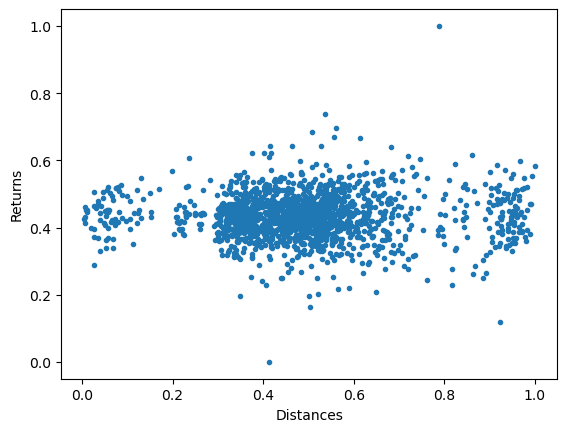

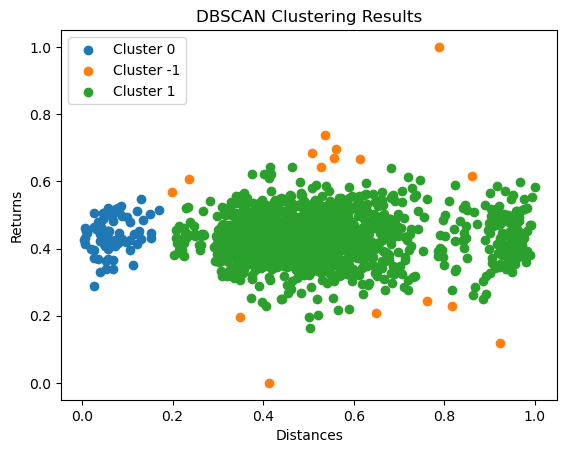

,Close,returns,distances,cluster
1695,0.995778,0.426480,0.004222,0
1696,0.994503,0.431141,0.005497,0
1697,0.994216,0.459756,0.005784,0
1692,0.992877,0.413153,0.007123,0
1694,0.991694,0.451742,0.008306,0
...,...,...,...,...
274,0.011050,0.380401,0.988950,1
358,0.009701,0.470340,0.990299,1
360,0.009045,0.471080,0.990955,1
290,0.005349,0.554704,0.994651,1


,Close,returns,distances,cluster
0,4494.649902,51.550293,0.635901,1.0
1,4546.200195,186.149902,0.626375,1.0
2,4732.350098,15.199707,0.591979,1.0
3,4747.549805,90.000000,0.589170,1.0
4,4837.549805,94.650391,0.572540,1.0
...,...,...,...,...
1694,7891.100098,22.100098,0.008306,0.0
1695,7913.200195,-6.900391,0.004222,0.0
1696,7906.299805,-1.549805,0.005497,0.0
1697,7904.750000,31.299805,0.005784,0.0


In [194]:
def knn_search(data, query, enable_normalization=True, eps=0.05, min_samples=5):
    # Ensure query is a DataFrame
    query = pd.DataFrame([query])

    # Scaling the data
    if enable_normalization:
        data_min = data.min()
        data_max = data.max()
        query = (query - data_min) / (data_max - data_min)
        temp_data = (data - data_min) / (data_max - data_min)
    else:
        temp_data = data.copy()

    # Drop the 'returns' column
    #temp_data = temp_data.drop(columns=["returns"])
    #query = query.drop(columns=["returns"])

    # Display the temporary data and query for debugging
    display(temp_data)
    display(query)
    
    # Calculate distances
    temp_data['distances'] = np.linalg.norm(temp_data[['Close']].values - query[['Close']].values, axis=1)
    
    # Sort by distances
    temp_data = temp_data.sort_values(by='distances', ascending=True)[1:]
    
    # Display sorted data for debugging
    # display(sorted_data)
    
    # Plot the results
    plt.figure()
    plt.plot(temp_data['distances'], temp_data['returns'], '.')
    plt.xlabel('Distances')
    plt.ylabel('Returns')
    plt.show()
    
    # DBSCAN clustering
    cluster_data = temp_data[['distances', 'returns']]
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    temp_data['cluster'] = dbscan.fit_predict(cluster_data)
    
    # Plotting clustered data
    plt.figure()
    unique_clusters = temp_data['cluster'].unique()
    for cluster in unique_clusters:
        cluster_points = temp_data[temp_data['cluster'] == cluster]
        plt.scatter(cluster_points['distances'], cluster_points['returns'], label=f'Cluster {cluster}')
    plt.xlabel('Distances')
    plt.ylabel('Returns')
    plt.legend()
    plt.title('DBSCAN Clustering Results')
    plt.show()

    display(temp_data)
    data['distances'] = temp_data['distances']
    data['cluster'] = temp_data['cluster']
    display(data)
    
    return data


sorted_data = knn_search(data,data.iloc[-1,:])

In [175]:
sorted_data

,Close,returns,distances,cluster
1695,0.995778,0.426480,0.004222,0
1696,0.994503,0.431141,0.005497,0
1697,0.994216,0.459756,0.005784,0
1692,0.992877,0.413153,0.007123,0
1694,0.991694,0.451742,0.008306,0
...,...,...,...,...
274,0.011050,0.380401,0.988950,1
358,0.009701,0.470340,0.990299,1
360,0.009045,0.471080,0.990955,1
290,0.005349,0.554704,0.994651,1


Processing sensex_1990_to_2014.csv :   0%|             | 0/2707 [00:00<?, ?it/s]

,Close,returns
0,0.510206,0.539869
1,0.520117,0.480370
2,0.516985,0.495149
3,0.517093,0.450361
4,0.507383,0.515100
...,...,...
1524,0.517375,0.514417
1525,0.521707,0.383458
1526,0.497330,0.566594
1527,0.513100,0.574928


,Close,returns
1529,0.550221,0.482272


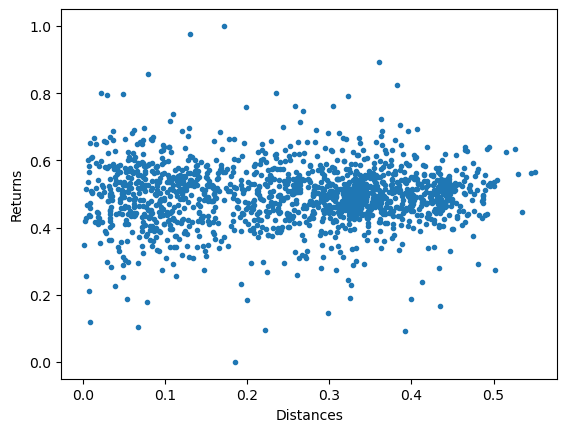

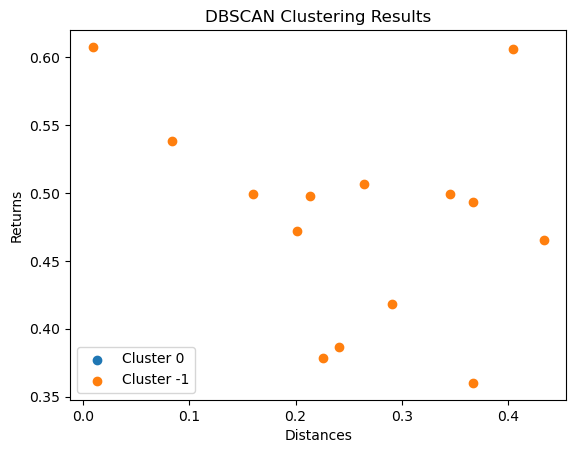

Processing sensex_1990_to_2014.csv :   0%|     | 1/2707 [00:00<22:55,  1.97it/s]

,Close,returns
1,0.520117,0.480370
2,0.516985,0.495149
3,0.517093,0.450361
4,0.507383,0.515100
5,0.511865,0.629172
...,...,...
1525,0.521707,0.383458
1526,0.497330,0.566594
1527,0.513100,0.574928
1528,0.530698,0.583713


,Close,returns
1530,0.547507,0.507054


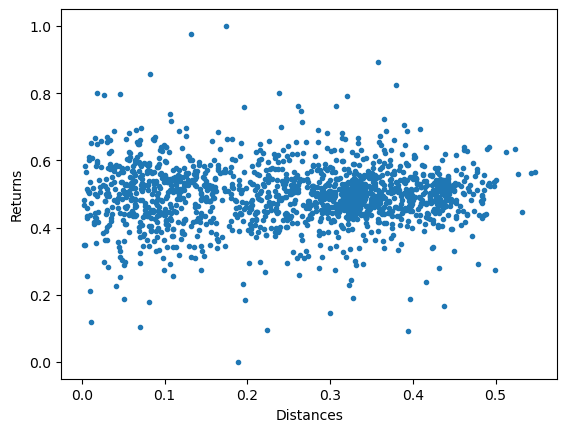

Processing sensex_1990_to_2014.csv :   0%|     | 1/2707 [00:00<30:27,  1.48it/s]


IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

<Figure size 640x480 with 0 Axes>

In [176]:
estimated_price_dictionary = {}
actual_price_dictionary = {}
for file in filenames:
    data = pd.read_csv(file)
    data = TI_calculations(data)
    
    actual_close_price = []
    estimated_close_price = []
    for i in tqdm(range(data.shape[0]-train_set_length-1),desc = f"Processing {file} : "):
        data_for_search = data.iloc[i:i+train_set_length,:]
        query = data.iloc[i+train_set_length,:]
    
        sorted_data = knn_search(data_for_search,query,k_param)
        estimated_return = sorted_data['returns'].mean()
    
        estimated_close_price.append(query['Close'] + estimated_return)
        actual_close_price.append(data.iloc[i+train_set_length+1,:]['Close'])

    # Error metrics
    estimated_close_price = np.array(estimated_close_price)
    actual_close_price = np.array(actual_close_price)

    estimated_price_dictionary[file] = estimated_close_price
    actual_price_dictionary[file] = actual_close_price

# **Visualization**

In [ ]:
plt.figure(figsize = (12,5))

plt.subplot(131)
plt.title(f"File : {filenames[0]}")
plt.plot(actual_price_dictionary[filenames[0]])
plt.plot(estimated_price_dictionary[filenames[0]])
plt.legend(['actual_close_price','estimated_close_price'])

plt.subplot(132)
plt.title(f"File : {filenames[1]}")
plt.plot(actual_price_dictionary[filenames[1]])
plt.plot(estimated_price_dictionary[filenames[1]])
plt.legend(['actual_close_price','estimated_close_price'])

plt.subplot(133)
plt.title(f"File : {filenames[2]}")
plt.plot(actual_price_dictionary[filenames[2]])
plt.plot(estimated_price_dictionary[filenames[2]])
plt.legend(['actual_close_price','estimated_close_price'])

plt.show()

In [ ]:
plt.figure(figsize = (12,5))

plt.subplot(131)
plt.title(f"File : {filenames[0]}")
plt.plot(actual_price_dictionary[filenames[0]] - estimated_price_dictionary[filenames[0]])

plt.subplot(132)
plt.title(f"File : {filenames[1]}")
plt.plot(actual_price_dictionary[filenames[1]] - estimated_price_dictionary[filenames[1]])

plt.subplot(133)
plt.title(f"File : {filenames[2]}")
plt.plot(actual_price_dictionary[filenames[2]] - estimated_price_dictionary[filenames[2]])

plt.show()

In [ ]:
for file in filenames:
    error = actual_price_dictionary[file] - estimated_price_dictionary[file]
    print(f"The rmse for {file} with enable_knn_normalization as {enable_knn_normalization} is {np.sqrt(np.mean(error**2))} <br>")

# **Result**

**Only Close price**

The rmse for sensex_1990_to_2014.csv with enable_knn_normalization as True is 69.56409629760876 <br>
The rmse for nifty_1994_to_2014.csv with enable_knn_normalization as True is 38.41585383388505 <br>
The rmse for nifty_2000_to_2024.csv with enable_knn_normalization as True is 50.3351461228365 <br>